<a href="https://colab.research.google.com/github/saketolfa/Projects/blob/main/Weather%20Prediction/Temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Temperature Prediction**


</br>Goal: Analyse the weather dataset and predict the temperature


1.   **Import libraries**



In [ ]:
# import libraries
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split ,learning_curve , RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import loguniform


2.   **Load the dataset**

*Link*: https://www.kaggle.com/budincsevity/szeged-weather



In [ ]:
# Read the dataset from a CVS file
weather_history = pd.read_csv('/content/weatherHistory.csv')
# Check if our dataset was loaded correctly
weather_history.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.



3.   **Exploratory Data Analysis**
      1. **Form Analysis**


In [ ]:
# Get a copy of the dataset
data = weather_history.copy()

In [ ]:
# Data shape
data.shape

(96453, 12)

In [ ]:
# Types of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
# NaN VALUES
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

<Axes: >

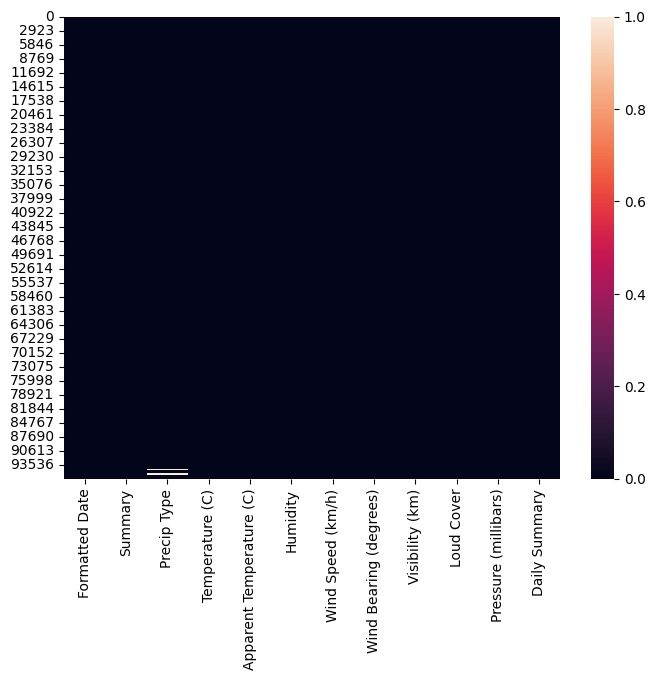

In [ ]:
# Visualise missing values
plt.figure(figsize = (8,6))
sns.heatmap(data.isnull())

2. **Deep analysis**

<Axes: ylabel='Precip Type'>

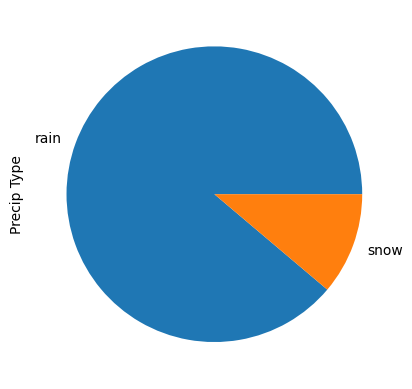

In [ ]:
# Visualize the missing column
data['Precip Type'].value_counts().plot.pie()

<Axes: xlabel='Precip Type', ylabel='count'>

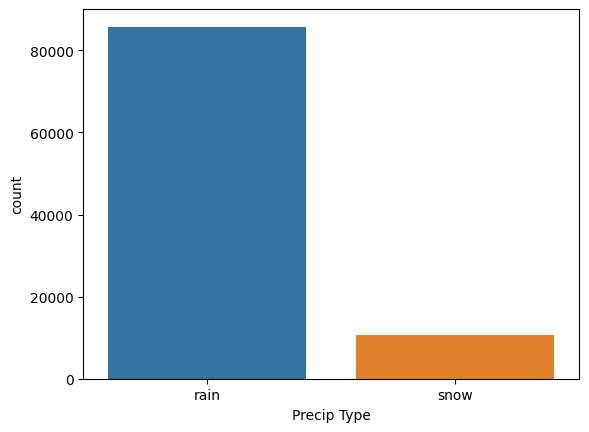

In [ ]:
sns.countplot(x = data['Precip Type'])

In [ ]:
# Replace the missing values with the most frequent value
data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)


In [ ]:
# Check the missing values
data.isnull().sum().sum()

0

In [ ]:
# Columns' name
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
data['Loud Cover'].unique()

array([0.])

In [ ]:
print(data['Summary'].unique() ,'\n')
data['Summary'].value_counts()

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain'] 



Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [ ]:
data['Pressure (millibars)'].value_counts()

0.00       1288
1017.70     123
1015.00     119
1018.00     118
1015.80     118
           ... 
998.75        1
1039.86       1
1042.97       1
1043.01       1
997.59        1
Name: Pressure (millibars), Length: 4979, dtype: int64

In [ ]:
# Convert  Formatted Date  to datatime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'] , utc=True)
data['year'] = data['Formatted Date'].dt.year
data['month'] = data['Formatted Date'].dt.month
data['day'] = data['Formatted Date'].dt.day
data['hour'] = data['Formatted Date'].dt.hour
data.drop('Formatted Date' , axis = 1 , inplace=True)

In [ ]:
data.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,2
5,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,2006,4,1,3
6,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,2006,4,1,4
7,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,2006,4,1,5
8,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,2006,4,1,6
9,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,2006,4,1,7


In [ ]:
rain_vis = 0
snow_vis = 0
r  = 0
s = 0
for i in range(0 , len(data)):
  if data['Precip Type'][i] == 'rain':
    rain_vis = rain_vis + data['Visibility (km)'][i]
    r = r + 1
  else:
    snow_vis = snow_vis + data['Visibility (km)'][i]
    s = s + 1


print(rain_vis / r )
print(snow_vis / s )

10.830710903029749
6.678602315433467


Text(0.5, 1.0, 'Visibility')

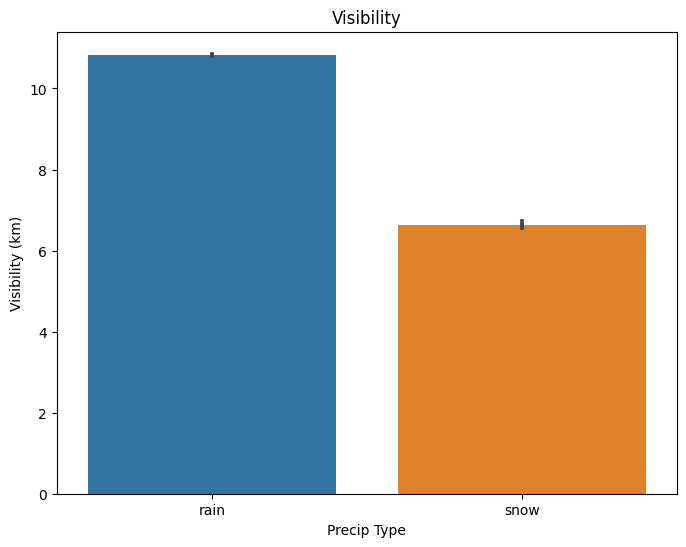

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data=data , x ='Precip Type'  ,y ='Visibility (km)' )
plt.title('Visibility')

In [ ]:
data['Pressure (millibars)'].replace(0.0 , data['Pressure (millibars)'].median() ,inplace=True)
data['Pressure (millibars)'].value_counts()

1016.45    1341
1017.70     123
1015.00     119
1015.80     118
1018.00     118
           ... 
999.45        1
1000.95       1
1037.99       1
1037.53       1
997.59        1
Name: Pressure (millibars), Length: 4978, dtype: int64

In [ ]:
# All the values of 'Loud Cover' are 0, so we can drop it
data.drop('Loud Cover' , axis = 1,inplace =True)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,year,month,day,hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,2006,4,1,2


In [ ]:
# Separate numerical and categorical variables

# numerical variables
cat_columns = data.select_dtypes(include = 'object').keys()

# categorical variables
num_columns =['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']


In [ ]:
print('cat_columns',cat_columns)
print('num_columns:',num_columns)

cat_columns Index(['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary'], dtype='object')
num_columns: ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']


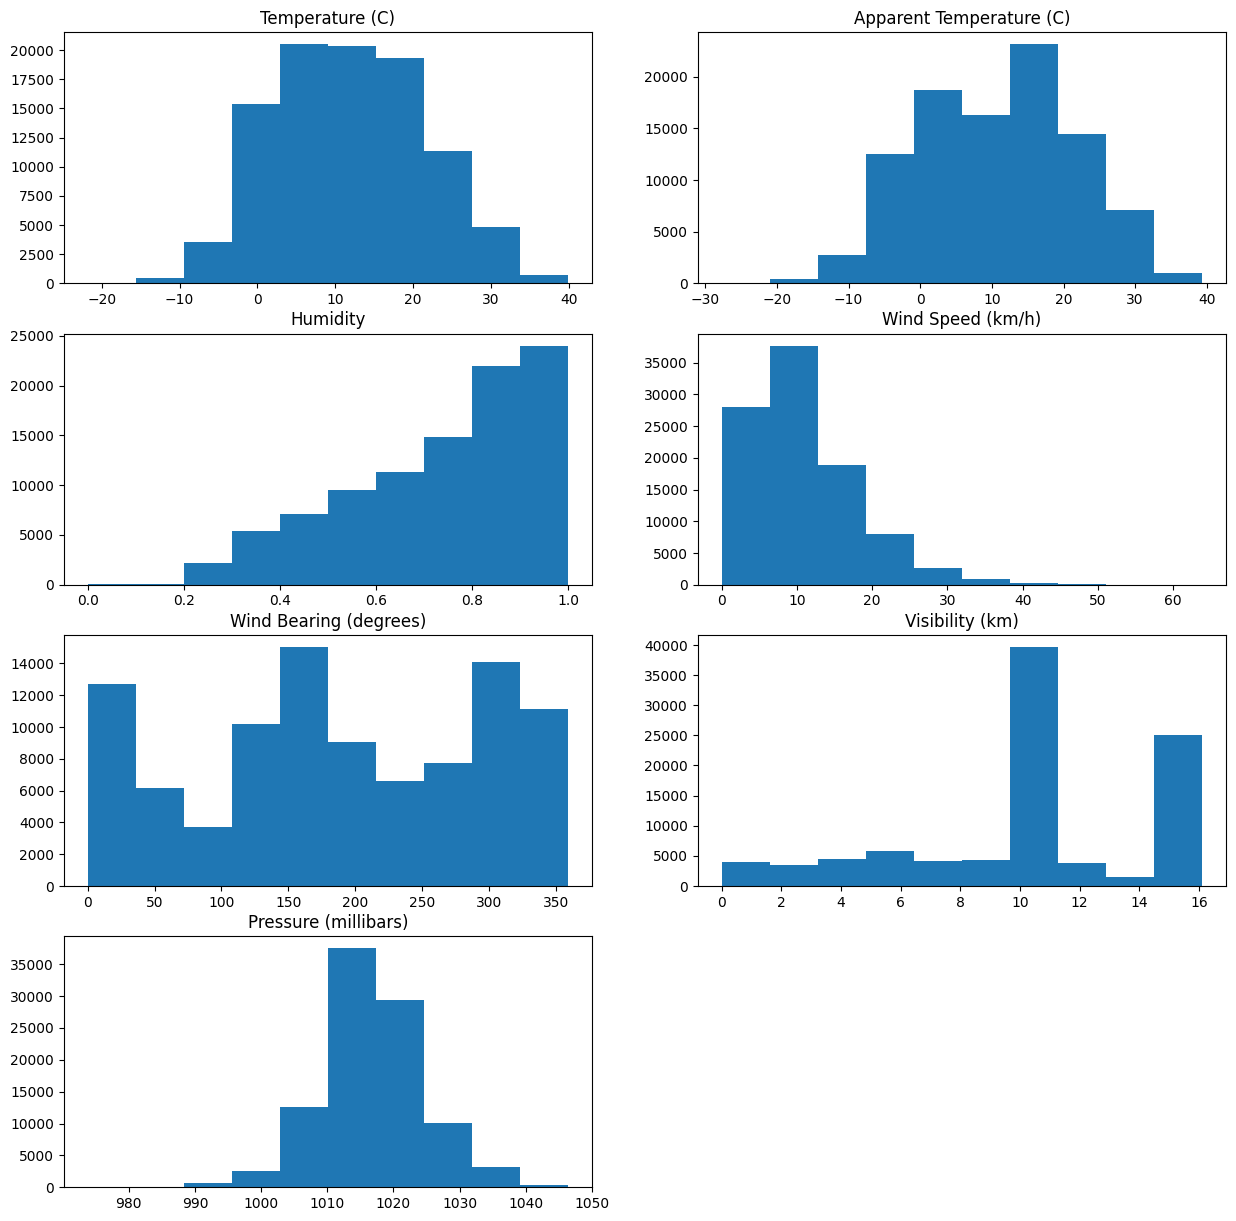

In [ ]:
# Distribution of the numerical variabels
pos = 0
plt.figure(figsize = (15,15))
for col in num_columns:
  pos = pos+1
  plt.subplot(4,2,pos)
  plt.hist(data[col])
  plt.title(col)

<ipython-input-8-e283e1b5c8ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-8-e283e1b5c8ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-8-e283e1b5c8ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seabor

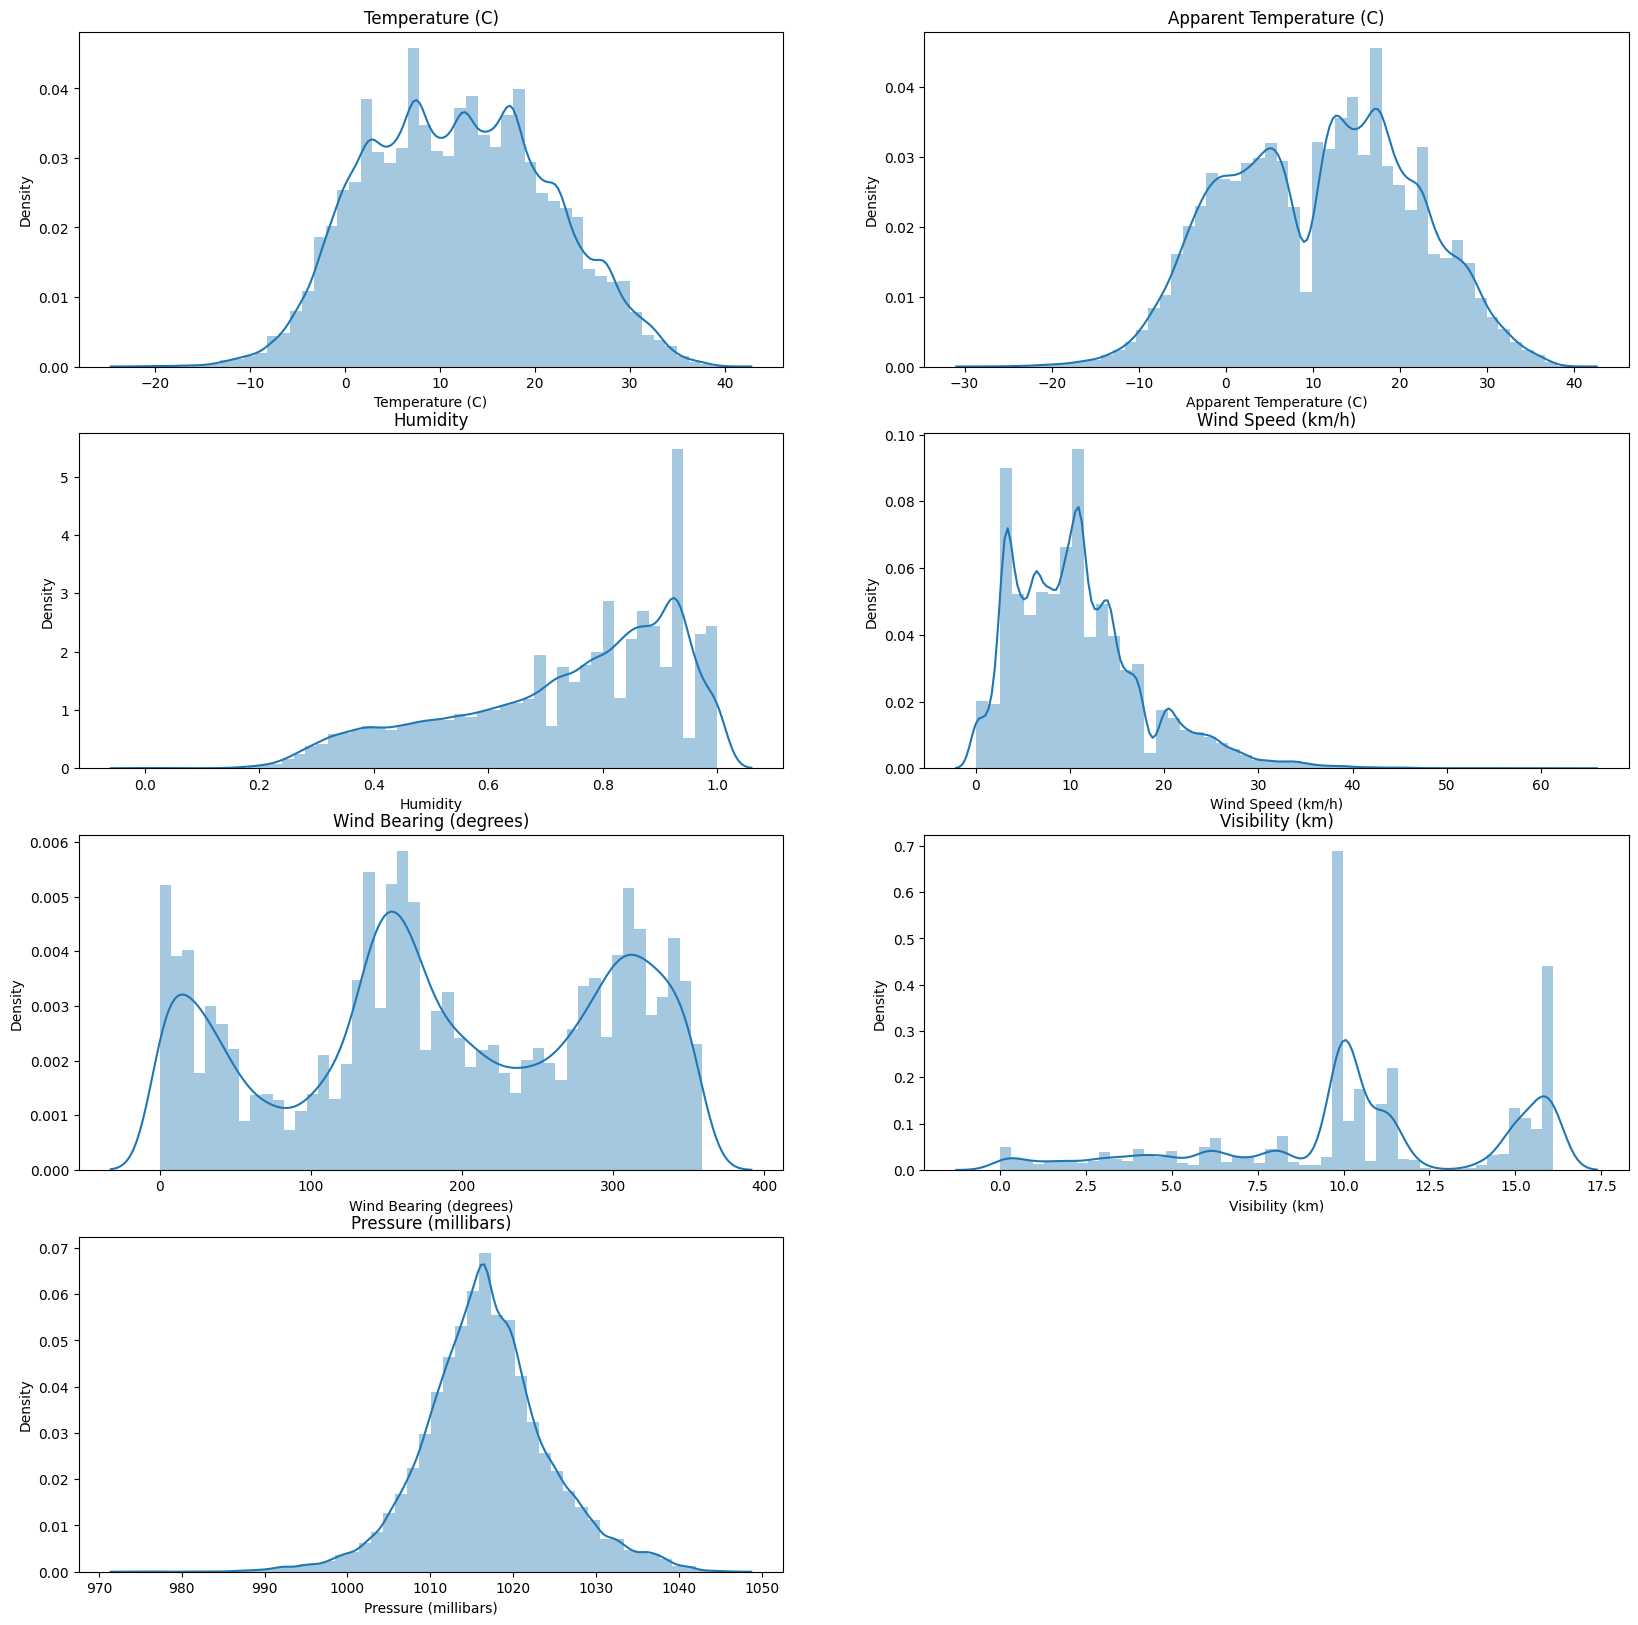

In [ ]:
# Distribution of the numerical variabels
pos = 0
plt.figure(figsize = (20,20))
for col in num_columns:
  pos = pos+1
  plt.subplot(4,2,pos)
  sns.distplot(data[col])
  plt.title(col)

In [ ]:
for col in cat_columns:
  print()
  print(f'{col}:{data[col].unique()}')


Summary:['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']

Precip Type:['rain' 'snow']

Daily Summary:['Partly cloudy throughout the day.' 'Mostly cloudy throughout the day.'
 'Foggy in the evening.' 'Foggy overnight and breezy in the morning.'
 'Overcast throughout the day.' 'Partly cloudy until night.'
 'Mostly cloudy until night.'
 'Foggy starting overnight continuing until morning.'
 'Foggy in the morning.' 'Partly cloudy until evening.'
 'Partly cloudy starting in the morning.'
 'Mostly cloudy starting overnight continuing until night.'
 '

In [ ]:
pd.pivot_table( data, index ='Precip Type' , values =num_columns )

,Apparent Temperature (C),Humidity,Pressure (millibars),Temperature (C),Visibility (km),Wind Bearing (degrees),Wind Speed (km/h)
Precip Type,,,,,,,
rain,12.992016,0.718862,1015.998741,13.832126,10.810926,189.102763,10.976633
snow,-6.249847,0.863263,1023.296973,-3.270885,6.636570,174.754294,9.481998


In [ ]:
#basic statistics for columns of data
data[num_columns].describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1016.809278
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,7.726359
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,973.780000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1012.200000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [ ]:
# correlation between variables
data[num_columns].corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.308120
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.286078
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.039032
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.251391
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.078211
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,-0.164598
Pressure (millibars),-0.308120,-0.286078,0.039032,-0.251391,-0.078211,-0.164598,1.000000


<Axes: >

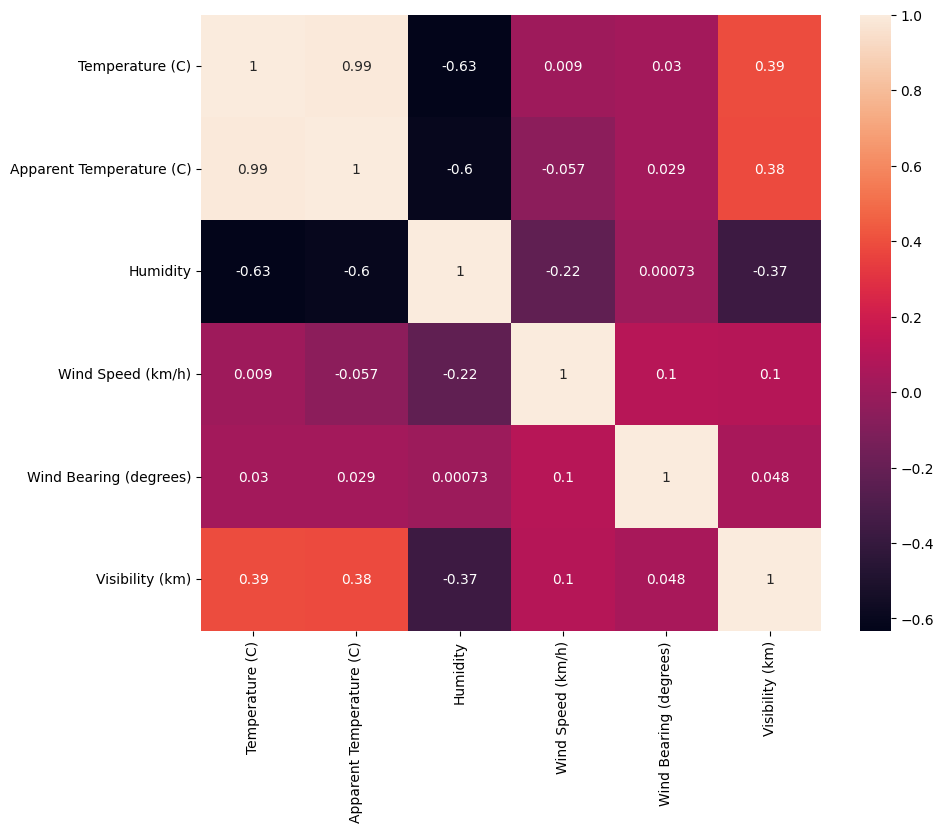

In [ ]:
# correlation between variables
plt.figure(figsize = (10 ,8))
sns.heatmap(data[num_columns].corr() , annot=True)

In [ ]:
#mean temperature of every year
resultat = data[['Temperature (C)' ,'year']].groupby(['year']).mean()
resultat

,Temperature (C)
year,
2005,0.577778
2006,11.215225
2007,12.134677
2008,12.161819
2009,12.269682
2010,11.200176
2011,11.524934
2012,11.986824
2013,11.941017


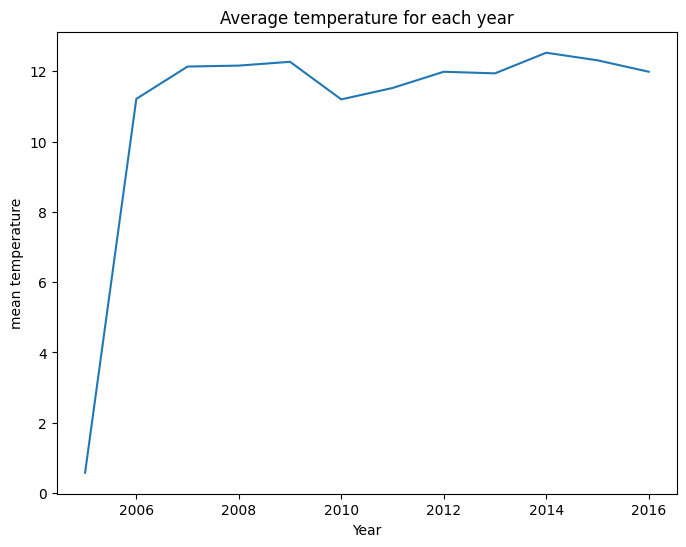

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(resultat.index , resultat['Temperature (C)'])
plt.xlabel('Year')
plt.ylabel('mean temperature')
plt.title('Average temperature for each year')
plt.show()

In [ ]:
# Average temperature for each month
monthly_mean_temperature = data[['Temperature (C)' ,'month']].groupby(['month']).mean()
months=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]

monthly_mean_temperature.index = months
monthly_mean_temperature


,Temperature (C)
January,0.815678
February,2.166880
March,6.914976
April,12.769200
May,16.874455
June,20.728510
July,22.965462
August,22.339134
September,17.503458
October,11.334119


Month with the Highest Temperature: 
July 22.965461978296595


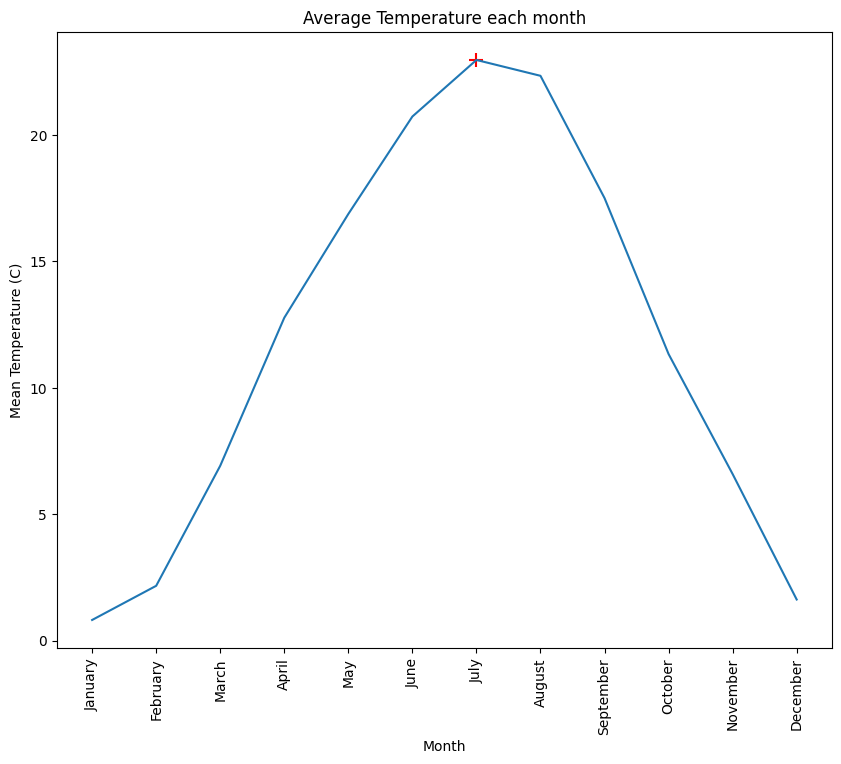

In [ ]:
# Month with the Highest Temperature:
max_temperature = monthly_mean_temperature['Temperature (C)'].max()
month_max_temperature = monthly_mean_temperature[monthly_mean_temperature['Temperature (C)'] == monthly_mean_temperature['Temperature (C)'].max()].index[0]
print("Month with the highest temperature: ")
print( month_max_temperature , max_temperature)

# plot the result
plt.figure(figsize = (10, 8))
plt.plot(monthly_mean_temperature.index ,monthly_mean_temperature['Temperature (C)'])
plt.scatter(x =month_max_temperature  , y =max_temperature , c='r' , marker='+' , s = 100)
plt.xlabel('Month')
plt.xticks(rotation='vertical')
plt.ylabel('Mean Temperature (C)')
plt.title('Average Temperature each month')
plt.show()

In [ ]:
# Average wind speed for each year
mean_wind = data[['Wind Speed (km/h)' ,'year']].groupby(['year']).mean()
mean_wind

,Wind Speed (km/h)
year,
2005,17.114300
2006,10.189128
2007,10.824162
2008,11.304172
2009,11.507326
2010,11.014343
2011,9.898596
2012,11.264745
2013,10.970036


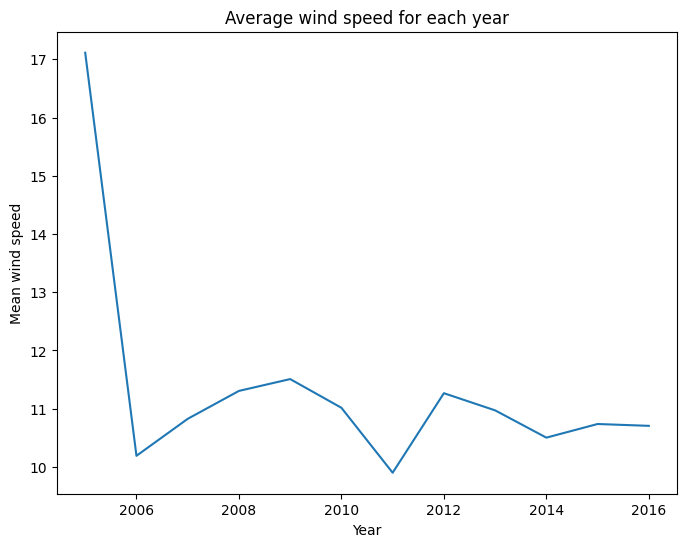

In [ ]:
# Plot the result
plt.figure(figsize = (8, 6))
plt.plot(mean_wind.index ,mean_wind['Wind Speed (km/h)'])
plt.xlabel('Year')
plt.ylabel('Mean wind speed')
plt.title('Average wind speed for each year')
plt.show()

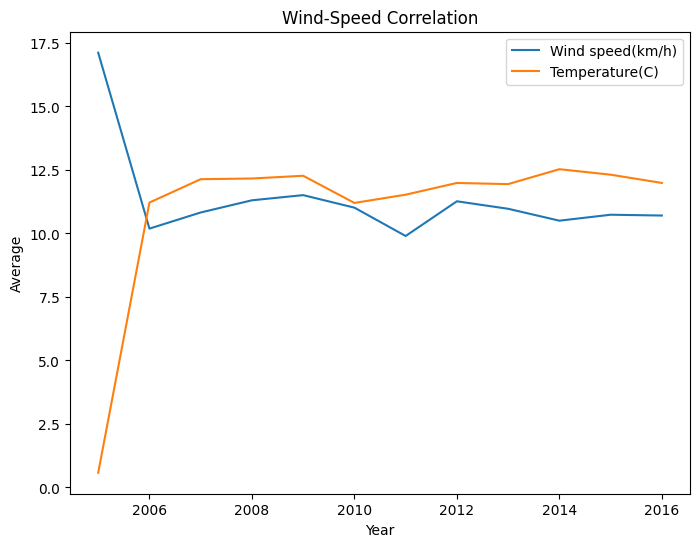

In [ ]:
# Wind-Speed Correlation
plt.figure(figsize = (8, 6))
plt.plot(mean_wind.index ,mean_wind['Wind Speed (km/h)'] , label='Wind speed(km/h)')
plt.plot(resultat.index , resultat['Temperature (C)'] , label = 'Temperature(C) ')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Wind-Speed Correlation')
plt.legend()
plt.show()


<br/>**Summary:** </br>

1. Form analysis

  **Traget :** temperature(C) |
  **Rows and columns :** (96453, 12) |</br>
  **Type of variables:** float64(8), object(4) | </br>
  **Missing values analysis**: 517 (Precip Type ), there are not many missing values </br>

2. Deep analysis

  **Continuous variables:** 'Loud Cover' all of its values are null , Pressure (millibars) cannot be null while there are 1288 values equal zero,  temperature/ pressure/ Apparent Temperature (C) have a normal distribution, many variables can be normalized later. | </br>
  **Categorical variables:** ,Summary , Daily Summary  describe in detail what
  the 'Precip Type' column ,  we can only use 'Precip Type'. |  </br>
  **Continuous / Categorical relationship:** the Visibility and the temperature  in the rain are  higher than in the snow. |  </br>
  **Continuous / target relationship:** temperature / Apparent Temperature:     high corrolation, temperature/ humidity : low corrolation ,We notice that the
  temperature has been high since 2006 . When the temperature is low, the wind
  speed is high. |  </br>
  **Categorical / target relationship:**The  temperature in the rain is higher
  than in the snow. </br>






4. **Preprocessing**

In [ ]:
# Create a copy of the dataset
df = weather_history.copy()
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Split the dataset into random trainset and testset
trainset , testset= train_test_split(df , test_size= 0.20 , random_state=0)
print('trainset dimension' , trainset.shape[0])
print('testset dimension' , testset.shape[0])

trainset dimension 77162
testset dimension 19291


In [ ]:
# Feature_engineering function
def feature_engineering(df):

  # Convert  Formatted Date  to datatime
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'] , utc=True)
  df['year'] = df['Formatted Date'].dt.year
  df['month'] = df['Formatted Date'].dt.month
  df['day'] = df['Formatted Date'].dt.day
  df['hour'] = df['Formatted Date'].dt.hour

  return df

In [ ]:
# Clean function
def clean(df):

    df.drop(['Formatted Date','Summary' ,'Loud Cover' ,'Daily Summary'] , axis = 1 , inplace=True)
    # Replace the missing values with the most frequent value
    df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)
    df['Pressure (millibars)'].replace(0.0 , df['Pressure (millibars)'].median() ,inplace=True)

    return df

In [ ]:
# Encodage function
def encodage(df):
  code = { 'rain':0,
          'snow': 1}
  df['Precip Type'] = df['Precip Type'].map(code)

  return df


In [ ]:
# Preprocessing function
def preprocessing (df):

   df = feature_engineering(df)
   df = clean(df)
   df = encodage(df)

   # Features
   x = df.drop('Temperature (C)' , axis = 1)
    # Target
   y = df['Temperature (C)']

   return x , y

In [ ]:
x_train , y_train = preprocessing (trainset)
x_test , y_test = preprocessing (testset)

5. **Model**

In [ ]:
# Create pipelines
linear_regression = make_pipeline(LinearRegression())
DecTreeReg = make_pipeline( StandardScaler(), DecisionTreeRegressor())
forestReg = make_pipeline( StandardScaler(), RandomForestRegressor())
boostReg = make_pipeline( StandardScaler(),GradientBoostingRegressor())

# Create a dictionary of pipelines
models = {
          'Linear Regression' : linear_regression,
          'Decision Tree Regressor' : DecTreeReg,
          'Random Forest Regressor':forestReg,
          'Gradient Boosting Regressor' : boostReg


}

In [ ]:
# evaluation function
def evaluation(model):

  # train the model
  model.fit(x_train , y_train)

  # prediction
  y_pred = model.predict(x_test)

  # loss function
  print('MSR',mean_squared_error(y_test , y_pred))

  # Learning Curve
  n , train_scores , val_scores= learning_curve(model , x_train , y_train , cv = 4  , train_sizes = np.linspace(0.1 , 1, 10))

  # plot learning curve
  plt.figure(figsize = (8,8))
  plt.plot(n,train_scores.mean(axis=1) , label='Train-Curve')
  plt.plot(n,val_scores.mean(axis = 1) ,label='Val-Curve')
  plt.xlabel('Training examples')
  plt.ylabel('Score')
  plt.title('Leanring Curve')
  plt.legend()
  plt.show()


linear_regression
MSR 0.8769388958803682


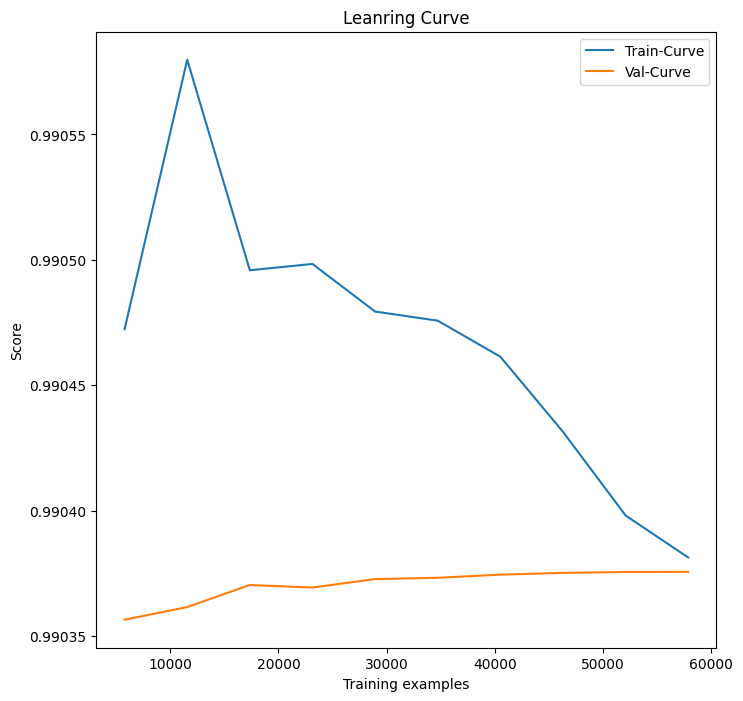

   ***************************************************************************************************************************************
DecisionTreeRegressor
MSR 0.006695082975429599


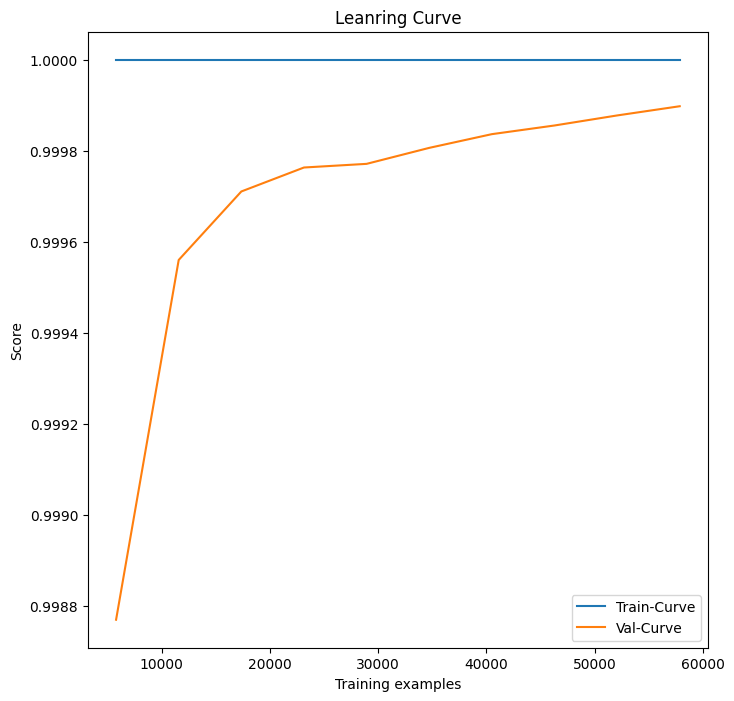

   ***************************************************************************************************************************************
RandomForestRegressor
MSR 0.0022367854129508283


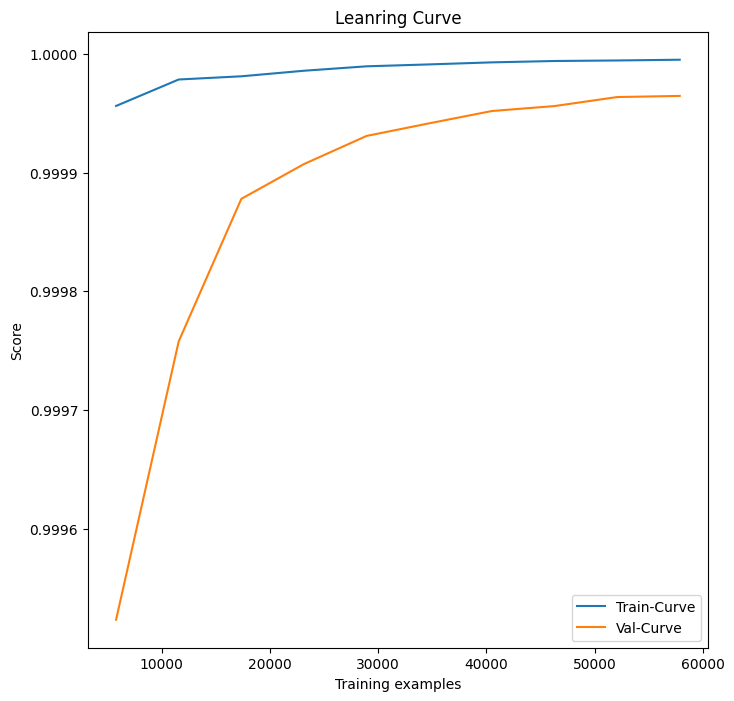

   ***************************************************************************************************************************************
GradientBoostingRegressor
MSR 0.04388379860798181


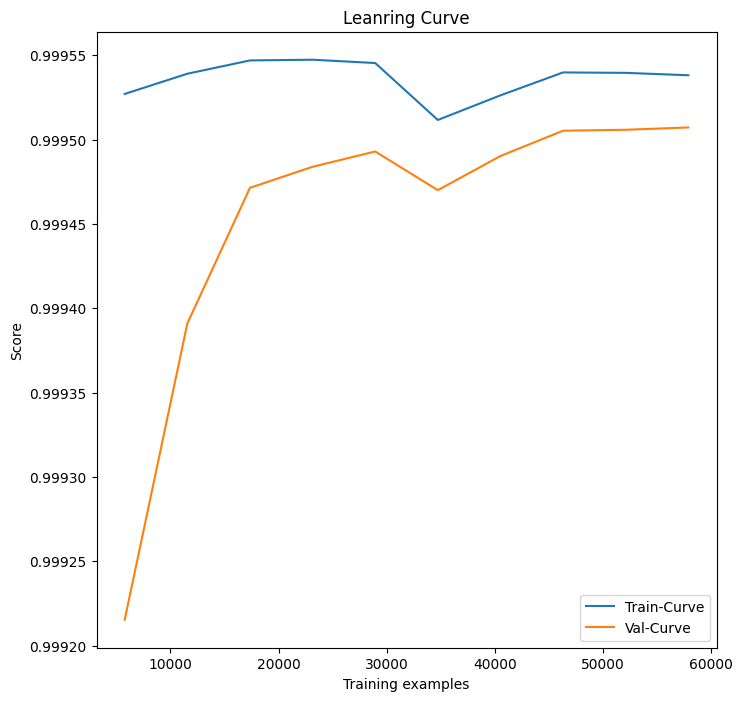

   ***************************************************************************************************************************************


In [ ]:
for name , model in models.items():
  print(name)
  evaluation(model)
  print('   ***************************************************************************************************************************************')

<br/>**Summary:** </br>

  > DecisionTreeRegressor ,RandomForestRegressor : According to the learning curve, both of these models are experiencing overfitting </br>
  > The training curve and validation curve in GradientBoostingRegressor run parallel to each other. Therefore, I have chosen to optimize the GradientBoostingRegressor model based on this observation.

</br>




In [ ]:
# Hyper parameters of the  gradient boosting regressor  model
hyper_params = {
    "gradientboostingregressor__n_estimators": [ 50, 100,150 ,200],
     "gradientboostingregressor__max_leaf_nodes": [2, 5, 10],
    "gradientboostingregressor__learning_rate": loguniform(0.01, 1)
}

In [ ]:
grid = RandomizedSearchCV(boostReg  ,hyper_params,n_iter=40 , cv = 4)
grid.fit(x_train , y_train)
print(grid.best_params_)

{'gradientboostingregressor__learning_rate': 0.5355670942414047, 'gradientboostingregressor__max_leaf_nodes': 10, 'gradientboostingregressor__n_estimators': 200}


MSR 0.011323279264622258


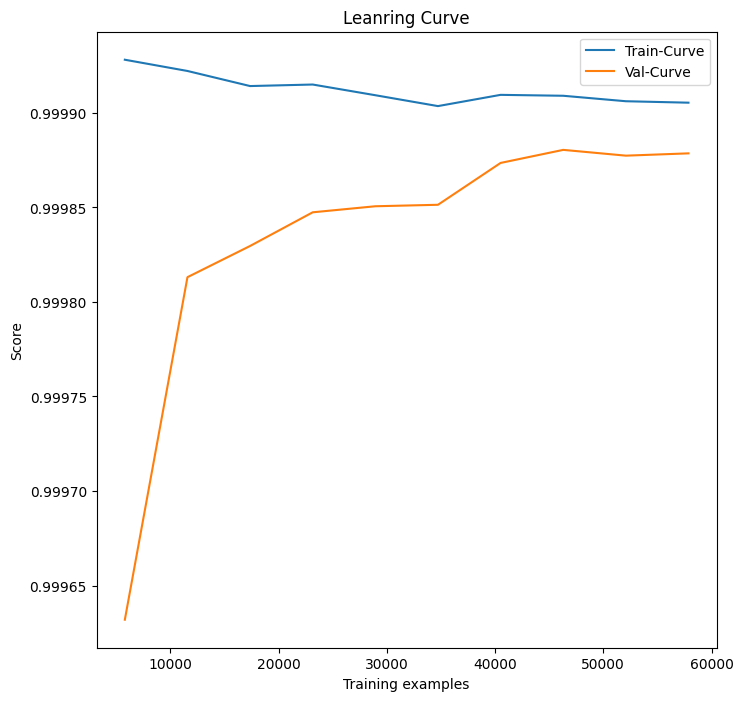

In [ ]:
# get the best model
estimator = grid.best_estimator_
evaluation(estimator)

**END**